## What is regression

- Regression is used to make prediction from data by learning about the relationship between a given set of dependent and independent variables.

### Prediction using linear regression

- <b>Linear regression</b> is one of the most widely known modeling techniques.
- <b>Simple linear regression</b> is an example of linear regression with only one independent variable and on dependent variable.
- To predict price y and the relationship of A the equation is Y = A*x + b
- 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2024-06-27 17:48:39.723834: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 17:48:39.723860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-27 17:48:39.724571: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-27 17:48:39.729402: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


- Demonstate the idea by generating a scatter plot to demonstate the idea

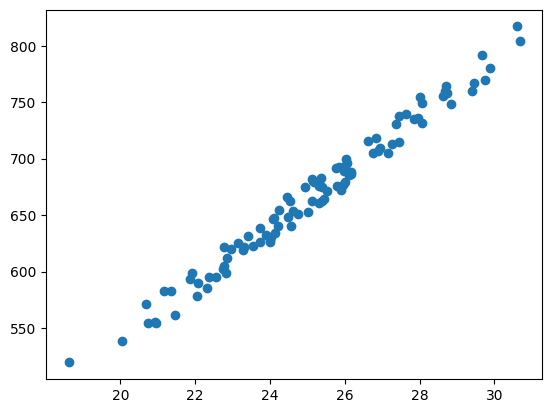

In [3]:
# generate a random data
np.random.seed(0)

area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20, 50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=["area", "price"])
plt.scatter(data["area"], data["price"])
plt.show()

In [4]:
## Now calculate the two regression coefficents
W = sum(price*(area - np.mean(area))) / sum((area - np.mean(area))**2)
b = np.mean(price) - W*np.mean(area)
print("The regression coefficients are:", W, b)

The regression coefficients are: 24.815544052284988 43.4989785533412


In [5]:
## Predict the new prices using obtained weight and bias
y_pred = W * area + b

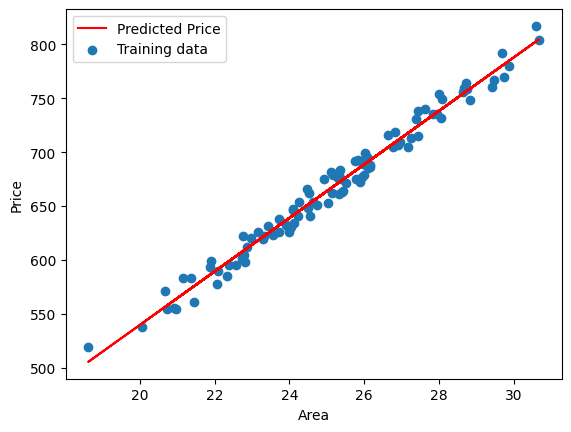

In [7]:
## Now plot the predicted along with actual price
plt.plot(area, y_pred, color='red', label='Predicted Price')
plt.scatter(data['area'], data['price'], label='Training data')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()

## Multiple linear regression

- Multiple regression depends on multiple independent input variables and the dependent variable (Y)
- Y = W^t*X + b
- where X = {x1, x2, ..., xn} are the n independent input variables

### Multivariate Linear Regression

- Some cases exist where the independent variables affect more than one dependent variables
- Yij = woj + SUM(Xkj*xjk) for k=1 to p

### Neural newworks for linear regression

### Simple linear regression using TensorFlow Keras

In [8]:
## Start importing packages to perform simple linear regression
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense

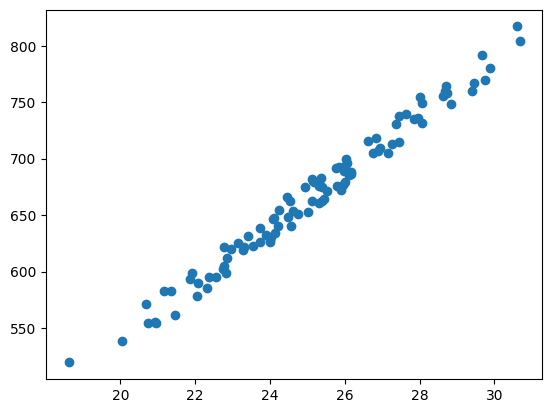

In [9]:
## Next generate the data

# Generate random data
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20, 50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data=data.T, columns=['area', 'price'])

plt.scatter(data['area'], data['price'])
plt.show()

In [10]:
## The input of neural networks need to be normalized.  If we have large values and they 
##     get multiplied by a weight, then the change will be large and our metrics might get too
##     large for the computer to process

data = (data - data.min()) / (data.max() - data.min())  #normalize

In [12]:
## Let's build a model, we only need one  Dense layer
model = K.Sequential([
    Dense(1, input_shape = [1,], activation=None)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-06-29 05:41:09.170835: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2024-06-29 05:41:09.170872: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: 6c059fea88aa
2024-06-29 05:41:09.170881: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: 6c059fea88aa
2024-06-29 05:41:09.170953: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 545.23.6
2024-06-29 05:41:09.170974: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.183.1
2024-06-29 05:41:09.170979: E external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:244] kernel version 535.183.1 does not match DSO version 545.23.6 -- cannot find working devices in this configuration


In [13]:
## Now define the loss function and optimizer, using mean_squared_error and sgd
model.compile(loss='mean_squared_error', optimizer='sgd')

In [14]:
## Train the model
model.fit(x=data['area'],
          y=data['price'],
          epochs=100, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 0s 51ms/step - loss: 0.3999 - val_loss: 0.4621
Epoch 2/100
3/3 [==============================] - 0s 9ms/step - loss: 0.3487 - val_loss: 0.4042
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 0.3028 - val_loss: 0.3540
Epoch 4/100
3/3 [==============================] - 0s 10ms/step - loss: 0.2639 - val_loss: 0.3138
Epoch 5/100
3/3 [==============================] - 0s 10ms/step - loss: 0.2324 - val_loss: 0.2779
Epoch 6/100
3/3 [==============================] - 0s 10ms/step - loss: 0.2047 - val_loss: 0.2471
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 0.1813 - val_loss: 0.2206
Epoch 8/100
3/3 [==============================] - 0s 9ms/step - loss: 0.1612 - val_loss: 0.1971
Epoch 9/100
3/3 [==============================] - 0s 10ms/step - loss: 0.1438 - val_loss: 0.1775
Epoch 10/100
3/3 [==============================] - 0s 10ms/step - loss: 0.1293 - val_loss: 0.1600
Epoch 11/100
3/3 [====

In [15]:
## Use the predict function to get a y for a specied value
y_pred = model.predict(data['area'])

4/4 [==============================] - 0s 1ms/step


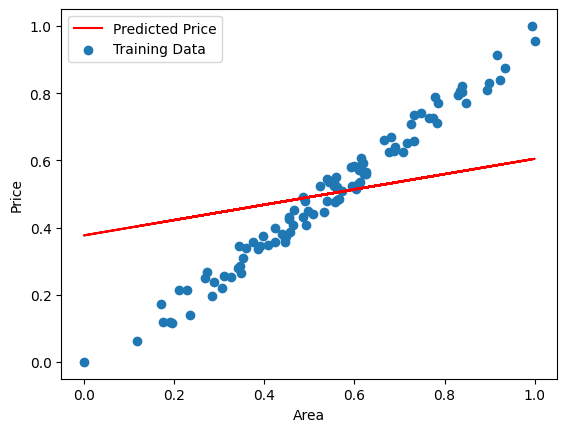

In [17]:
# Plot graph of predicted and actual data
plt.plot(data['area'], y_pred, color='red', label='Predicted Price')
plt.scatter(data['area'], data['price'], label='Training Data')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()

In [18]:
## to display the coefficients W and b
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.22803168]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.3765514], dtype=float32)>]

### Multiple and multivariate linear regression

- A deep neural network - is a neural network having more than one layer,
- A deep neural network is like applying multiple function approximations:
- f(x) = fL(fL-1(...F1(x)...))

### Build a neural network to predict feul efficiency of cars

In [ ]:
## Import the modules that we need
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Normalization
import seaborn as sns